In [138]:
import numpy as np
from matplotlib import pyplot as plt 

In [139]:
x_train = np.linspace(0, 10 * np.pi, 10000) 
y_train = np.sin(x_train)

x_train = x_train.reshape(-1, 1) # shape (1000, 1)
print(x_train.shape)

(10000, 1)


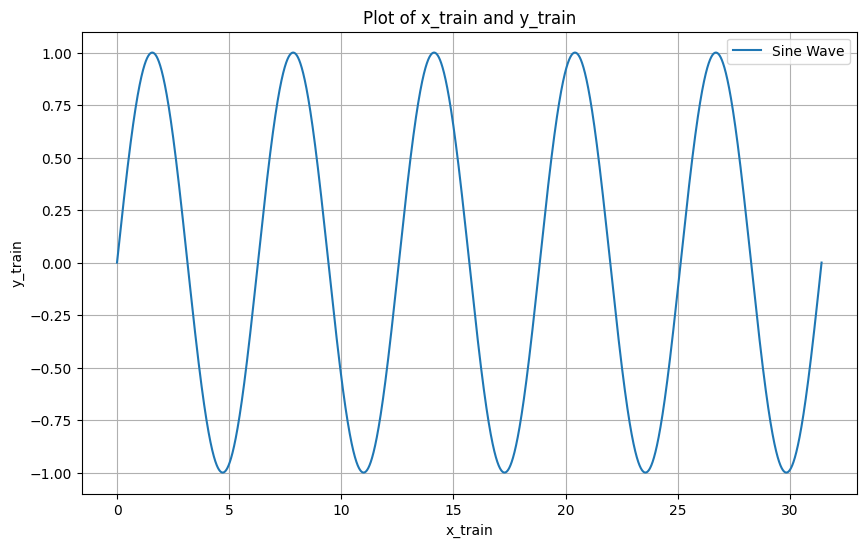

In [140]:
plt.figure(figsize= (10, 6))
plt.plot(x_train, y_train, label='Sine Wave')
plt.title('Plot of x_train and y_train')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.grid(True)
plt.show()

In [141]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [142]:
x = np.random.rand(100,1) # neurons state
C = np.zeros((100,1)) # credit state
W = np.random.rand(100,100) - 0.5 # weights of all-to-all network

print(x.shape)
print(C.shape)

s = W @ x # inputs
print(s.shape)
f_s = sigmoid_derivative(s)

(100, 1)
(100, 1)
(100, 1)


In [143]:
err = []
for step in range(len(y_train)):
    # INPUT CLAMPING
    
    last = np.inf
    for _ in range(500):
        x[0] = x_train[step]
        x = sigmoid(W @ x)
        new = np.sum(x)
        if np.abs(new - last) < 1e-6:
            break
        last = new
    

    S = W @ x
    F_s = sigmoid_derivative(S)

    # CREDIT REDISTRIBUTION - OUTPUT CLAMPING
    output_idx = -1
    target = y_train[step]
    diff = target - x[output_idx]
    err.append(diff)
    
    last = np.inf
    for _ in range(500):
        C[output_idx] = diff * 1000
        J = F_s.T * W.T
        
        C = J @ C
        new = np.sum(C)
        if np.abs(new - last) < 1e-6:
            break
        last = new

    # WEIGHT UPDATE
    C = C.reshape(100, 1)
    dW = (C * F_s) @ x.T  # Shape (n, n)
    # print(f"Update: {np.sum(dW)}, Neurons: {np.sum(x)}")
    W += dW



In [106]:
err = []
for point_idx in range(len(y_train)):
    last = np.sum(N)
    new = 1

    # INPUT CLAMPING
    while round(new, 6) != round(last, 6):
        N[0] = x_train[point_idx]
        N = sigmoid(np.matmul(W, N))
        last = new
        new = np.sum(N)
    

    S = np.matmul(W, N)
    F_s = sigmoid_derivative(S)

    # OUTPUT CLAMPING
    last = np.sum(C)
    new = 1
    diff = C[99] - y_train[point_idx]
    err.append(diff)
    while round(new, 6) != round(last, 6):
        C[99] = diff*100
        J = F_s * W
        C = np.matmul(J, C)
        last = new
        new = np.sum(N)
    
    dW = (C * F_s) @ N.T
    W += dW * 0.001
        

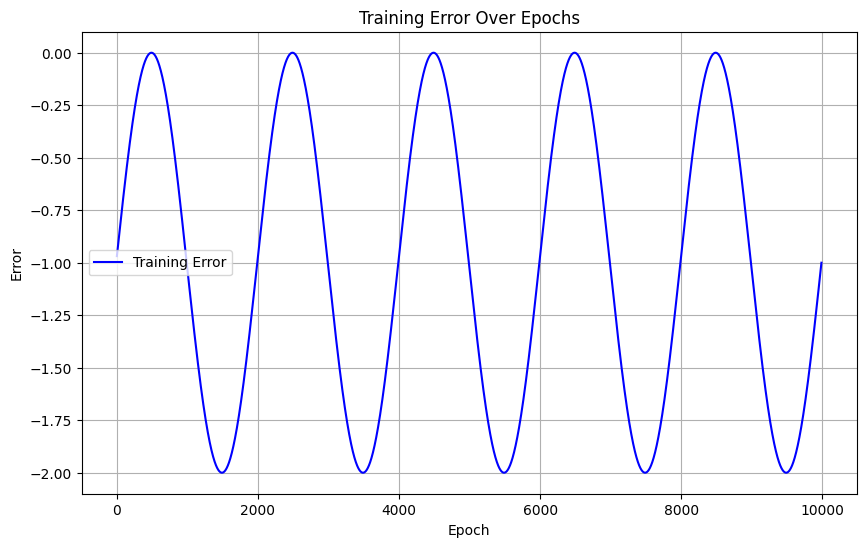

In [144]:
def plot_training_error(errors):
    """
    Plots the training error of a neural network over epochs.

    Parameters:
    errors (list): A list of error values recorded during training.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(errors, label='Training Error', color='blue')
    plt.title('Training Error Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_error(err[10:])